# Import

In [93]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
from config import password

# Extract CSVs into DataFrames

In [27]:
Gun_violence_2015_file = "Resources/Gun_violence_2015.csv"
Gun_violence_2015_df = pd.read_csv(Gun_violence_2015_file)
Gun_violence_2015_df.head()

,ID,state,year,gun_deaths,population,mass_shootings,violent_crime,property_crime,murder_crime,rape_crime,...,lawtotal,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons,alcohol_abuse,mental,depression
0,1,Alabama,2015,385,4850858,4,20166.0,173192.0,299.0,1370.0,...,10.0,74778,18212,15501,2550,2224,114419,188,691,250
1,2,Alaska,2015,70,737979,0,4416.0,19094.0,30.0,436.0,...,4.0,4499,1674,3527,1162,1242,12424,43,94,35
2,3,Arizona,2015,215,6802262,6,26789.0,229896.0,397.0,2499.0,...,11.0,82271,15987,25642,8996,2054,136115,373,925,342
3,4,Arkansas,2015,155,2975626,2,14173.0,110430.0,160.0,1230.0,...,11.0,44239,5140,12218,2159,1067,65425,120,438,172
4,5,California,2015,1204,39032444,27,154943.0,973822.0,1792.0,7665.0,...,102.0,245524,29550,11091,9058,13185,312264,2122,4997,1731


In [28]:
Gun_violence_2016_file="Resources/Gun_violence_2016.csv"
Gun_violence_2016_df = pd.read_csv(Gun_violence_2016_file)
Gun_violence_2016_df.head()


,ID,state,year,gun_deaths,population,mass_shootings,violent_crime,property_crime,murder_crime,rape_crime,...,lawtotal,destructive_device,machinegun,silencer,short_barreled_rifle,short_barreled_shotgun,total_weapons,alcohol_abuse,mental,depression
0,1,Alabama,2016,488,4860545,15,18363.0,168828.0,275.0,1355.0,...,10.0,77283,19390,30849,3765,2234,134687,169,680,245
1,2,Alaska,2016,88,741522,1,4537.0,20259.0,31.0,533.0,...,4.0,4651,1652,4213,1333,1268,13439,40,105,39
2,3,Arizona,2016,277,6908642,4,26528.0,226802.0,408.0,2191.0,...,11.0,86309,16318,28942,10351,2143,145248,304,902,310
3,4,Arkansas,2016,190,2988231,3,14711.0,103820.0,134.0,1321.0,...,11.0,45813,5189,14370,2464,1060,69500,123,468,181
4,5,California,2016,1265,39296476,46,164133.0,981939.0,1809.0,8331.0,...,104.0,256420,29516,11702,9472,13423,324417,2088,5072,1786


# Transform DataFrames

In [29]:
# Create a filtered dataframe from specific columns
Gun_violence_2015_columns = ["ID","state","gun_deaths","mass_shootings","total_weapons","alcohol_abuse","mental","depression"]
Gun_violence_2015_transformed= Gun_violence_2015_df[Gun_violence_2015_columns].copy()

Gun_violence_2015_transformed = Gun_violence_2015_transformed.rename(columns={ "ID":"id",
                                                                            "state": "states",
                                                                         "gun_deaths": "gun_deaths_2015",
                                                                        "mass_shootings":"mass_shootings_2015",
                                                                         "total_weapons": "total_weapons_2015",
                                                                         "alcohol_abuse": "alcohol_abuse_2015",
                                                                         "mental":"mental_2015",
                                                                         "depression":"depression_2015"})

Gun_violence_2015_transformed.set_index("id", inplace=True)
Gun_violence_2015_transformed.head()

,states,gun_deaths_2015,mass_shootings_2015,total_weapons_2015,alcohol_abuse_2015,mental_2015,depression_2015
id,,,,,,,
1,Alabama,385,4,114419,188,691,250
2,Alaska,70,0,12424,43,94,35
3,Arizona,215,6,136115,373,925,342
4,Arkansas,155,2,65425,120,438,172
5,California,1204,27,312264,2122,4997,1731


In [30]:
# Create a filtered dataframe from specific columns
Gun_violence_2016_columns = ["ID","gun_deaths", "mass_shootings","total_weapons","alcohol_abuse","mental","depression"]
Gun_violence_2016_transformed= Gun_violence_2016_df[Gun_violence_2016_columns].copy()

Gun_violence_2016_transformed = Gun_violence_2016_transformed.rename(columns={ "ID":"id",
                                                                         "gun_deaths": "gun_deaths_2016",
                                                                         "mass_shootings":"mass_shootings_2016",
                                                                         "total_weapons": "total_weapons_2016",
                                                                         "alcohol_abuse": "alcohol_abuse_2016",
                                                                         "mental":"mental_2016",
                                                                         "depression":"depression_2016"})

Gun_violence_2016_transformed.set_index("id", inplace=True)
Gun_violence_2016_transformed.head()

,gun_deaths_2016,mass_shootings_2016,total_weapons_2016,alcohol_abuse_2016,mental_2016,depression_2016
id,,,,,,
1,488,15,134687,169,680,245
2,88,1,13439,40,105,39
3,277,4,145248,304,902,310
4,190,3,69500,123,468,181
5,1265,46,324417,2088,5072,1786


# Create database connection

In [31]:
connection_string = "postgres:"+password+"@localhost:5432/Gun_violence_db"
engine = create_engine(f'postgresql://{connection_string}')

In [32]:
engine.table_names()

['gun_violence_2015', 'gun_violence_2016']

# Load DataFrames into database

In [33]:
Gun_violence_2015_transformed.to_sql(name='gun_violence_2015', con=engine, if_exists='replace', index=True)

In [34]:
Gun_violence_2016_transformed.to_sql(name='gun_violence_2016', con=engine, if_exists='replace', index=True)

# Confirm data has been added by querying the table

In [35]:
pd.read_sql_query('select * from gun_violence_2015', con=engine).head()

,id,states,gun_deaths_2015,mass_shootings_2015,total_weapons_2015,alcohol_abuse_2015,mental_2015,depression_2015
0,1,Alabama,385,4,114419,188,691,250
1,2,Alaska,70,0,12424,43,94,35
2,3,Arizona,215,6,136115,373,925,342
3,4,Arkansas,155,2,65425,120,438,172
4,5,California,1204,27,312264,2122,4997,1731


In [36]:
pd.read_sql_query('select * from gun_violence_2016', con=engine).head()

,id,gun_deaths_2016,mass_shootings_2016,total_weapons_2016,alcohol_abuse_2016,mental_2016,depression_2016
0,1,488,15,134687,169,680,245
1,2,88,1,13439,40,105,39
2,3,277,4,145248,304,902,310
3,4,190,3,69500,123,468,181
4,5,1265,46,324417,2088,5072,1786


In [98]:
Gun_violence_merged = """
SELECT Gun_violence_2015.id, Gun_violence_2015.states,Gun_violence_2015.gun_deaths_2015,Gun_violence_2015.mass_shootings_2015,Gun_violence_2015.total_weapons_2015,Gun_violence_2016.gun_deaths_2016,Gun_violence_2016.mass_shootings_2016,Gun_violence_2016.total_weapons_2016
FROM Gun_violence_2015
INNER JOIN Gun_violence_2016
ON Gun_violence_2015.id = Gun_violence_2016.id;

"""
Final_table=pd.read_sql_query(Gun_violence_merged , con=engine)
Final_table.set_index("states", inplace=True)
Final_table.head()

,id,gun_deaths_2015,mass_shootings_2015,total_weapons_2015,gun_deaths_2016,mass_shootings_2016,total_weapons_2016
states,,,,,,,
Alabama,1,385,4,114419,488,15,134687
Alaska,2,70,0,12424,88,1,13439
Arizona,3,215,6,136115,277,4,145248
Arkansas,4,155,2,65425,190,3,69500
California,5,1204,27,312264,1265,46,324417


# Analysis

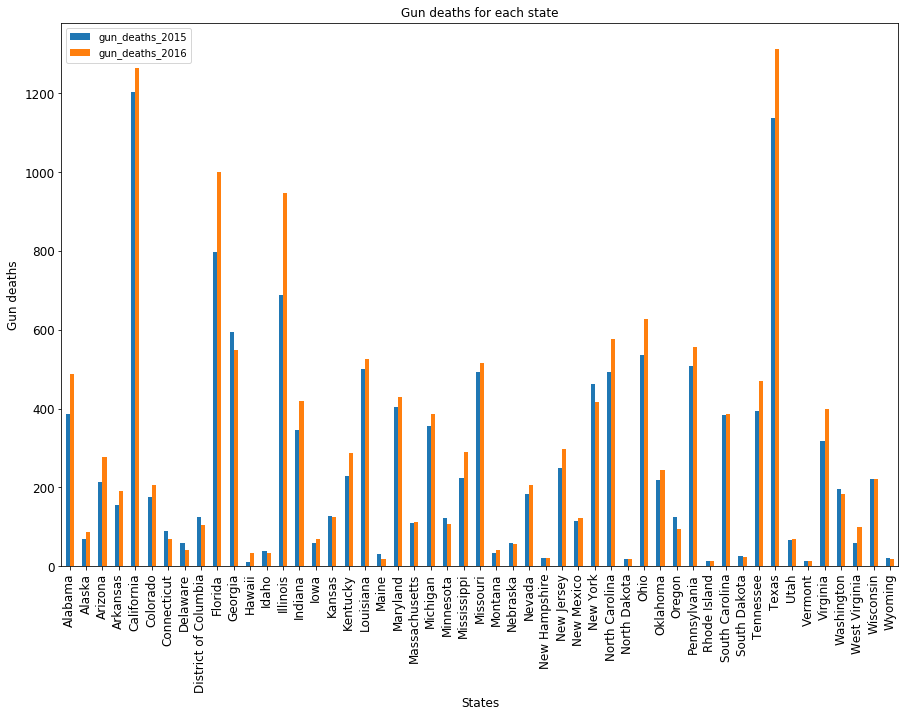

In [106]:
ax = Final_table[['gun_deaths_2015','gun_deaths_2016']].plot(kind='bar', title ="Gun deaths for each state",figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel("Gun deaths", fontsize=12)
plt.show()

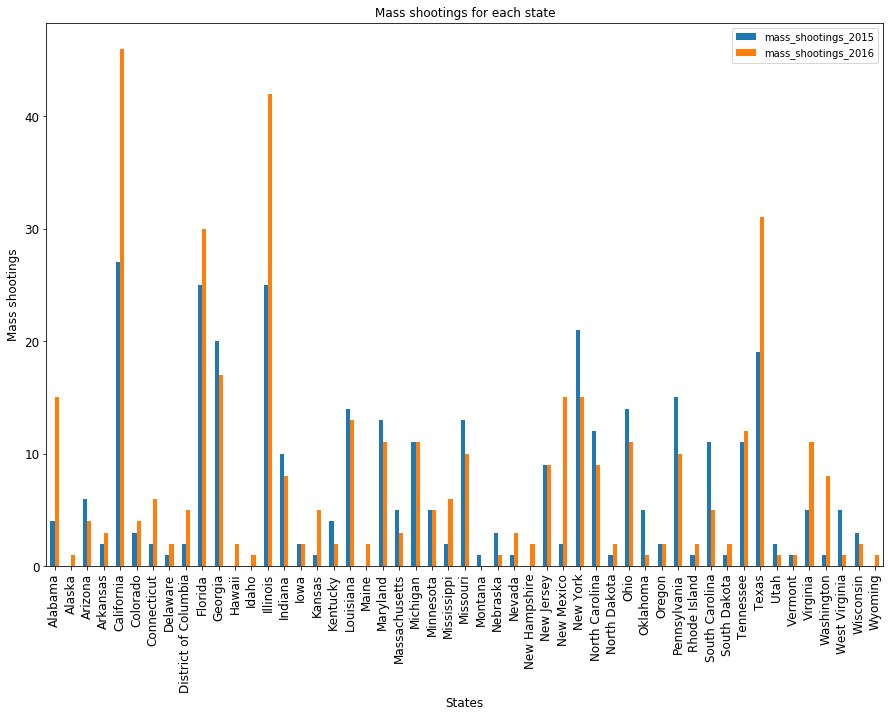

In [105]:
ax = Final_table[['mass_shootings_2015','mass_shootings_2016']].plot(kind='bar', title ="Mass shootings for each state",figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel("Mass shootings", fontsize=12)
plt.show()